# Data Preparing

In [4]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [5]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [6]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [7]:
fish_target = fish['Species'].to_numpy()
fish_target[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [8]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
train_scaled[:5]

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [ 0.30041219,  1.54653445,  1.45316551, -0.46981663,  0.27291745],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [-0.79734143, -0.60880176, -0.67486907, -0.82480589, -0.27631471],
       [-0.71289885, -0.73062511, -0.70092664, -0.0802298 , -0.7033869 ]])

# K-nearest neighbor classifier의 확률 예측

In [10]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [11]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [12]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [13]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [14]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


# Logistic Regression

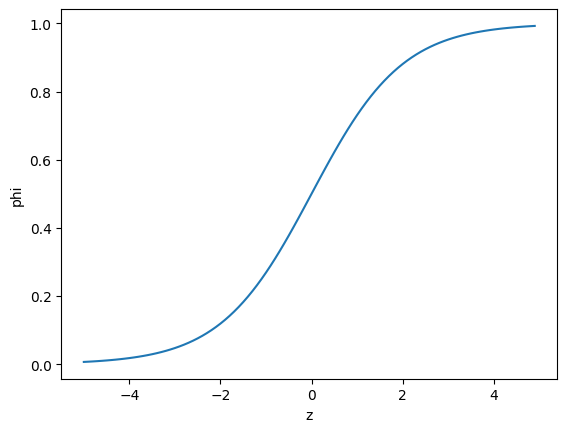

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 +np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

# Binary classification

In [3]:
# boolean indexing
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [16]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

print(bream_smelt_indexes)
print(train_bream_smelt)
print(target_bream_smelt)


[ True False  True False False False False  True False False False  True
 False False False  True  True False False  True False  True False False
 False  True False False  True False False False False  True False False
  True  True False False False False False  True False False False False
 False  True False  True False False  True False False False  True False
 False False False False False  True False  True False False False False
 False False False False False  True False  True False False  True  True
 False False False  True False False False False False  True False False
 False  True False  True False False  True  True False False False False
 False False False False  True  True False False  True False False]
[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]
 [ 0.30041219  0.23459067  0.42823457  1.36042157  0.22329758]
 [ 0.9027693   0.703142

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [18]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [24]:
print(lr.predict_proba(train_bream_smelt[:10]))
# 첫 번째 열이 음성 클래스(0): Bream, 두 번째 열이 양성 클래스(1):Smelt

[[9.97598548e-01 2.40145188e-03]
 [2.73518278e-02 9.72648172e-01]
 [9.94860716e-01 5.13928355e-03]
 [9.85842021e-01 1.41579793e-02]
 [9.97672689e-01 2.32731108e-03]
 [3.19313332e-02 9.68068667e-01]
 [9.73126218e-01 2.68737821e-02]
 [9.99532898e-01 4.67102003e-04]
 [9.86833271e-01 1.31667287e-02]
 [9.02298747e-01 9.77012526e-02]]


In [25]:
print(lr.classes_)

['Bream' 'Smelt']


In [26]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [27]:
decisions = lr.decision_function(train_bream_smelt[:10])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117   3.41171526
 -3.58936263 -7.66849569 -4.31680801 -2.22303129]


In [28]:
from scipy.special import expit
print(expit(decisions))

[2.40145188e-03 9.72648172e-01 5.13928355e-03 1.41579793e-02
 2.32731108e-03 9.68068667e-01 2.68737821e-02 4.67102003e-04
 1.31667287e-02 9.77012526e-02]


# Multiple Classification

In [29]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [30]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [32]:
proba = lr.predict_proba(test_scaled[:10])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]
 [0.999 0.    0.    0.    0.    0.    0.   ]
 [0.    0.001 0.05  0.    0.004 0.945 0.   ]
 [0.001 0.007 0.32  0.015 0.638 0.001 0.018]
 [0.    0.002 0.802 0.002 0.182 0.    0.011]
 [0.    0.    0.023 0.977 0.    0.    0.   ]]


In [33]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [34]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [35]:
decisions = lr.decision_function(test_scaled[:10])
print(np.round(decisions, decimals=2))

[[-6.500e+00  1.030e+00  5.160e+00 -2.730e+00  3.340e+00  3.300e-01
  -6.300e-01]
 [-1.086e+01  1.930e+00  4.770e+00 -2.400e+00  2.980e+00  7.840e+00
  -4.260e+00]
 [-4.340e+00 -6.230e+00  3.170e+00  6.490e+00  2.360e+00  2.420e+00
  -3.870e+00]
 [-6.800e-01  4.500e-01  2.650e+00 -1.190e+00  3.260e+00 -5.750e+00
   1.260e+00]
 [-6.400e+00 -1.990e+00  5.820e+00 -1.100e-01  3.500e+00 -1.100e-01
  -7.100e-01]
 [ 1.672e+01  8.350e+00 -3.340e+00 -4.900e+00  8.700e-01 -2.653e+01
   8.830e+00]
 [-1.233e+01  1.910e+00  5.760e+00 -2.900e+00  3.170e+00  8.690e+00
  -4.300e+00]
 [-2.620e+00 -8.500e-01  2.910e+00 -1.800e-01  3.600e+00 -2.880e+00
   2.000e-02]
 [-3.840e+00 -1.050e+00  4.990e+00 -9.300e-01  3.500e+00 -3.400e+00
   7.300e-01]
 [ 1.680e+00 -1.446e+01  1.050e+01  1.426e+01 -9.100e-01 -1.221e+01
   1.140e+00]]


In [36]:
from scipy.special import softmax
proba = softmax(decisions, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]
 [0.999 0.    0.    0.    0.    0.    0.   ]
 [0.    0.001 0.05  0.    0.004 0.945 0.   ]
 [0.001 0.007 0.32  0.015 0.638 0.001 0.018]
 [0.    0.002 0.802 0.002 0.182 0.    0.011]
 [0.    0.    0.023 0.977 0.    0.    0.   ]]
